In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway 

In [7]:
benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

In [8]:
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

In [9]:
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

In [20]:
metrics = ['GHI', 'DNI', 'DHI']
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.69  
Sierra Leone  153.69  
Togo          151.57

C:\Users\yoga\AppData\Local\Temp\ipykernel_6828\1487738079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')
C:\Users\yoga\AppData\Local\Temp\ipykernel_6828\1487738079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')
C:\Users\yoga\AppData\Local\Temp\ipykernel_6828\1487738079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')


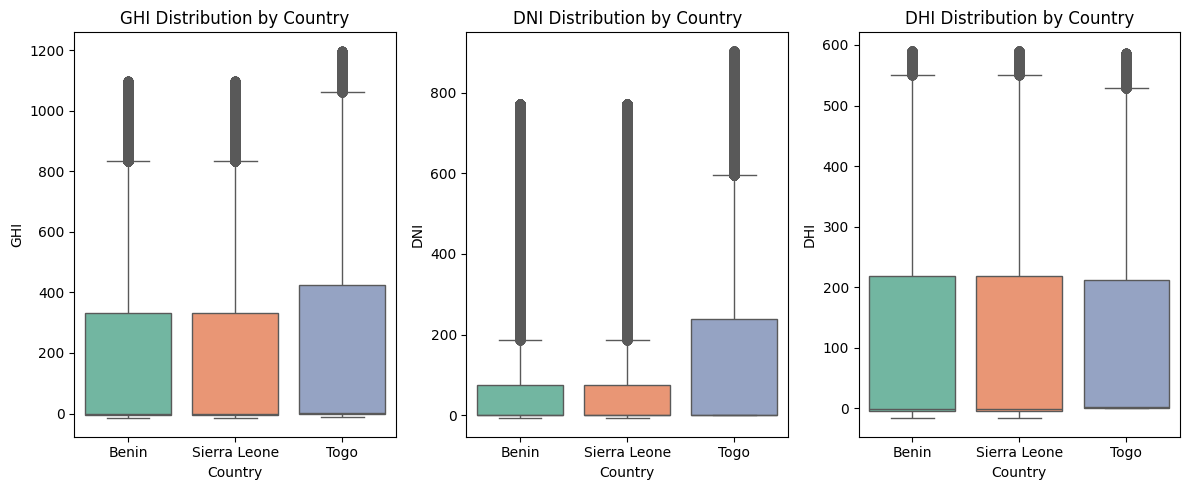

In [11]:
plt.figure(figsize=(12,5))
for i, col in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')
    plt.title(f'{col} Distribution by Country')
plt.tight_layout()
plt.show()


C:\Users\yoga\AppData\Local\Temp\ipykernel_6828\314738282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')
C:\Users\yoga\AppData\Local\Temp\ipykernel_6828\314738282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')
C:\Users\yoga\AppData\Local\Temp\ipykernel_6828\314738282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')


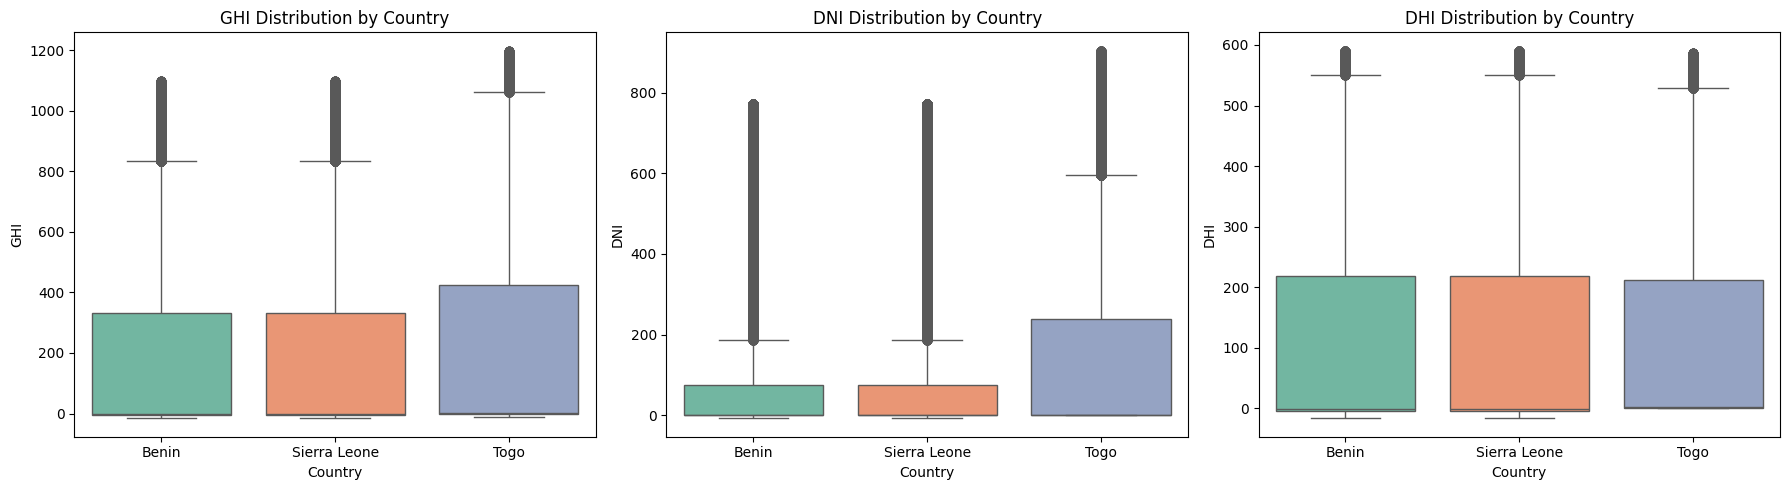

In [19]:
plt.figure(figsize=(18, 5))

for i, col in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x='Country', y=col, palette='Set2')
    plt.title(f'{col} Distribution by Country')
    plt.xlabel('Country')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [12]:
f_stat, p_val = f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])
print("ANOVA F-stat:", round(f_stat, 3))
print("p-value:", round(p_val, 5))


ANOVA F-stat: 3024.78
p-value: 0.0


In [13]:
from scipy.stats import kruskal
stat, p = kruskal(benin['GHI'], sierra['GHI'], togo['GHI'])


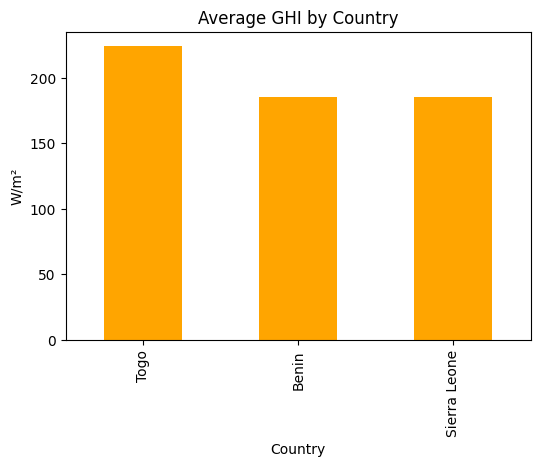

In [14]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color='orange', figsize=(6,4))
plt.title('Average GHI by Country')
plt.ylabel('W/m²')
plt.show()


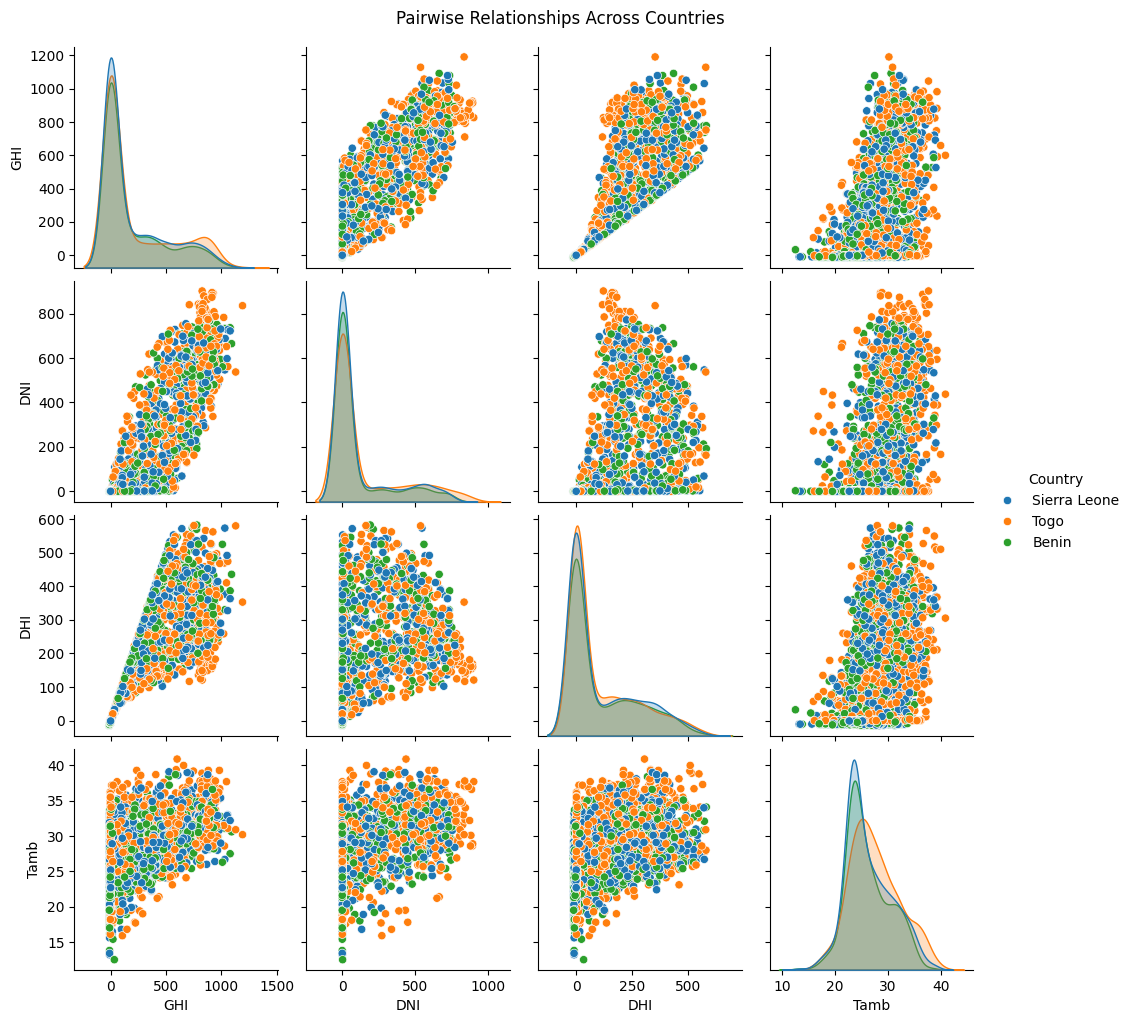

In [16]:
df_sample = df_all.sample(3000, random_state=42)
sns.pairplot(df_sample, vars=['GHI','DNI','DHI','Tamb'], hue='Country')
plt.suptitle('Pairwise Relationships Across Countries', y=1.02)
plt.show()


## **Key Cross-Country Solar Insights**

### **1. Summary Statistics**

A comparison of GHI, DNI, and DHI shows:

* **Togo** has the highest average GHI (≈ 224 W/m²), indicating the strongest solar potential.
* **Benin** and **Sierra Leone** show nearly identical GHI distributions (mean = 185 W/m²).
* Togo also has the highest variability (std = 317), meaning stronger radiation peaks.

---

## **2. ANOVA Test (Statistical Difference)**

**F-statistic:** 3024.78
**p-value:** 0.00000

Because the p-value is **< 0.05**, the differences in GHI across countries are **statistically significant**.
This confirms that solar potential is *not* the same across the three regions.

---

##  **3. Interpretation**

* **Togo** shows significantly stronger solar irradiance.
* **Benin** and **Sierra Leone** have lower but stable radiation levels.
* Higher humidity in Sierra Leone may reduce efficiency.

---

##  **4. Recommendation**

MoonLight Energy Solutions should:

* Prioritize **Togo** for **high-yield solar farm installation**.
* Consider **Benin** for more stable, predictable energy production.
* Investigate **Sierra Leone** for panel maintenance strategies due to humidity levels.

